# Problema de clasificación

<font color='blue'>El objetivo es identificar un modelo que nos permita predecir, con los datos proporcionados y consumiendo la menor cantidad de recuros posible, si los ingresos de una persona superan o no los 50.000$</font>

![](ML_pipeline.png)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns             #Para realizar gráficas
import matplotlib.pyplot as plt   #Para algunos parámetros de las gráficas
import graphviz
from matplotlib.colors import ListedColormap # Para utilizar un mapa de color
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble.partial_dependence import plot_partial_dependence
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#Para visualizar las gráficas en el notebook
%matplotlib inline  
%precision

# Mapa de color
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Análisis exploratorio

<font color='blue'>El primer paso es la carga de datos y una rápida visualización del número de muestras y características, así como "un primer vistazo" a los datos que obtenemos.</font>

In [3]:
datos = pd.read_csv("./census.csv", sep=",")
print('Num. de muestras: ', datos.shape[0])
print('Características:', datos.shape[1])
datos.head()

Num. de muestras:  45222
Características: 14


,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


<font color='blue'> El siguiente paso es entender la tipología (datos.dtypes) de las características objeto de estudio (aunque en este caso disponemos de información previa en el enunciado del ejercicio) y para ello analizamos los valores únicos de las distintas características.</font>

In [4]:
print('age : ' , sorted(list(datos['age'].unique())))
print('--------------------------------------------------------------------------------------------')
print('workclass : ' , list(datos['workclass'].unique()))
print('--------------------------------------------------------------------------------------------')
print('education_level : ' , list(datos['education_level'].unique()))
print('--------------------------------------------------------------------------------------------')
print('education-num : ' , list(datos['education-num'].unique()))
print('--------------------------------------------------------------------------------------------')
print('marital-status : ' , list(datos['marital-status'].unique()))
print('--------------------------------------------------------------------------------------------')
print('occupation : ' , list(datos['occupation'].unique()))
print('--------------------------------------------------------------------------------------------')
print('relationship : ' , list(datos['relationship'].unique()))
print('--------------------------------------------------------------------------------------------')
print('race : ' , list(datos['race'].unique()))
print('--------------------------------------------------------------------------------------------')
print('sex : ' , list(datos['sex'].unique()))
print('--------------------------------------------------------------------------------------------')
print('capital-gain : ' , list(datos['capital-gain'].unique()))
print('--------------------------------------------------------------------------------------------')
print('capital-loss : ' , list(datos['capital-loss'].unique()))
print('--------------------------------------------------------------------------------------------')
print('hours-per-week : ' , list(datos['hours-per-week'].unique()))
print('--------------------------------------------------------------------------------------------')
print('native-country : ' , list(datos['native-country'].unique()))
print('--------------------------------------------------------------------------------------------')
print('income : ' , list(datos['income'].unique()))

age -  [17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]
--------------------------------------------------------------------------------------------
workclass -  [' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov', ' Local-gov', ' Self-emp-inc', ' Without-pay']
--------------------------------------------------------------------------------------------
education_level -  [' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th', ' Some-college', ' Assoc-acdm', ' 7th-8th', ' Doctorate', ' Assoc-voc', ' Prof-school', ' 5th-6th', ' 10th', ' Preschool', ' 12th', ' 1st-4th']
--------------------------------------------------------------------------------------------
education-num -  [13.0, 9.0, 7.0, 14.0, 5.0, 10.0, 12.0, 4.0, 16.0, 11.0, 

<font color='blue'>Veamos la descripción global de los distintos datos. 
En este caso vemos que no existen NA ya que el campo "count" se corresponde con el núero total de muestras para todas las características, pero en el caso de no estar seguros de la existencia de NA utilizaríamos datos.isna().sum()</font>

In [5]:
datos.describe(include='all')

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
count,45222.000000,45222,45222,45222.000000,45222,45222,45222,45222,45222,45222.000000,45222.000000,45222.000000,45222,45222
unique,NaN,7,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,HS-grad,NaN,Married-civ-spouse,Craft-repair,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,33307,14783,NaN,21055,6020,18666,38903,30527,NaN,NaN,NaN,41292,34014
mean,38.547941,NaN,NaN,10.118460,NaN,NaN,NaN,NaN,NaN,1101.430344,88.595418,40.938017,NaN,NaN
std,13.217870,NaN,NaN,2.552881,NaN,NaN,NaN,NaN,NaN,7506.430084,404.956092,12.007508,NaN,NaN
min,17.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


<font color='blue'>Analizamos los datos relativos a los ingresos, ya que es el objetivo de la práctica</font>

In [6]:
print('Número de personas que ganan: ')
print(datos['income'].value_counts())
print('Datos poscentuales: ')
print(datos['income'].value_counts(normalize=True))

Número de personas que ganan: 
<=50K    34014
>50K     11208
Name: income, dtype: int64
Datos poscentuales: 
<=50K    0.752156
>50K     0.247844
Name: income, dtype: float64


<font color='blue'>El problema esta desbalanceado por lo que la ACC no es una metrica adecuada, se puede utilizar FSC o Balanced error rate (1-0.5(SEN+ESP). Por otro lado, para disponer de una perspectiva más igualitaria (aunque no realista en función de las muestras disponibles), utilizaremos "class weight".</font>

Nota: Módulo Machine Learning 101 _ Sesión 6 _ Parte I: 45:00

<font color='blue'>Utilizamos "Seaborn countplot" para realizar las gráficas de las distintas características en relación a "income", ya que nos permite realizar un primer análisis más en profundidad de todas las caracterísiticas (categóricas y numéricas).  </font>

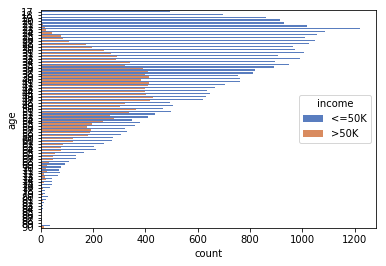

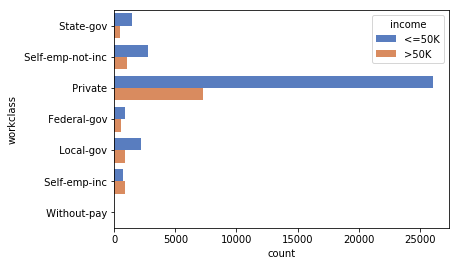

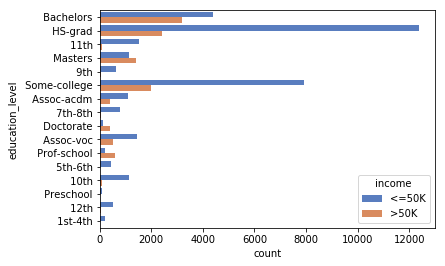

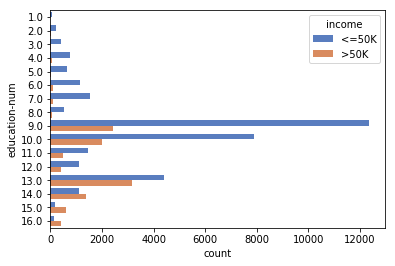

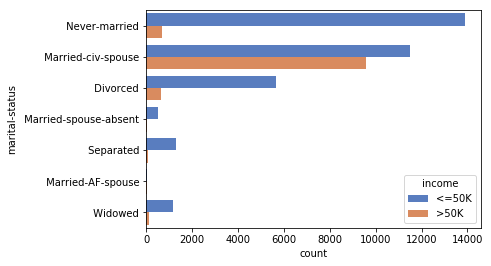

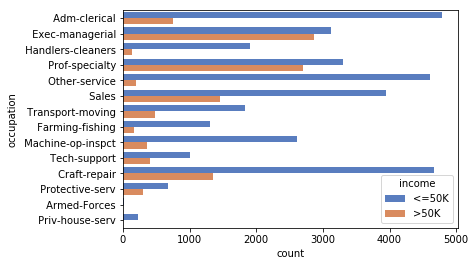

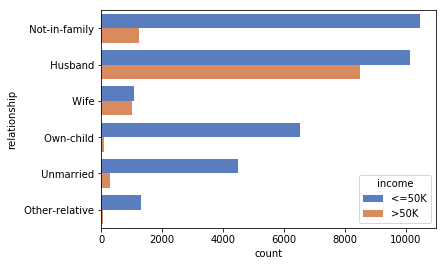

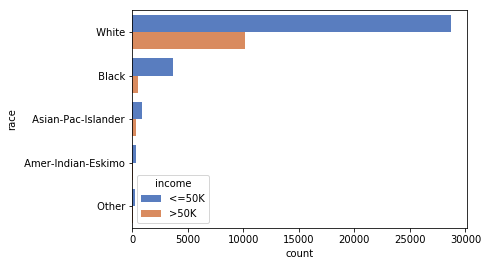

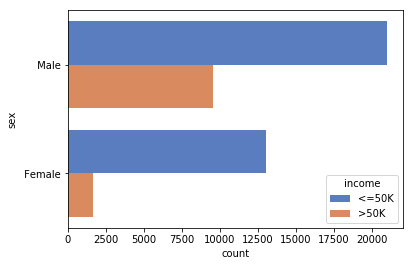

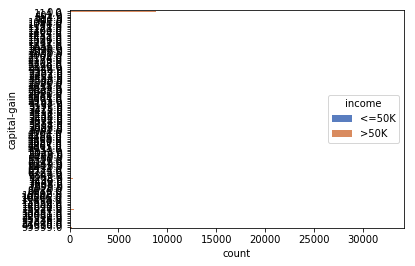

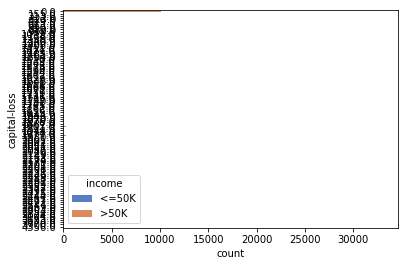

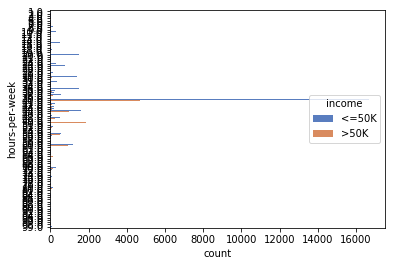

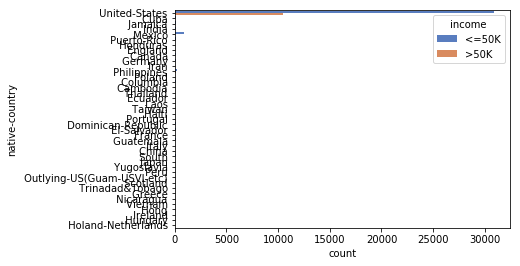

In [7]:
index=0
for feature in datos.columns.drop(['income']):
    plt.figure(index)
    sns.countplot(y=feature,hue=u'income', data=datos, palette='muted')
    index=index+1

<font color='blue'>Claramente hay algunos gráficos más útiles que otros. Se puede ver, por ejemplo, que hay un alto número de muestras centradas en "United-States" al igual que en horas por semana trabajadas hay un valor no determinado que es predominante. Se ven pocos datos relativos al capital ganado o perdido, e igualmente muy concentrados en valores concretos. No existe paridad en las muestras por sexo y hay un claro sesgo hacia las personas de raza blanca, casados o sin familia. Los datos relativos a la ocupación son están más distribuidos y en relación a la educación, el mayor volumen de muestras se centra en personas con estudios de universitarios que trabajan en el área privada. Finalmente, en relación a los ingresos, se dispone de un volumen de muestras sensiblemente mayor en las personas que ganan por debajo de 50K.</font>

# Procesamiento

<font color='blue'>Eliminamos el nivel de educación ya que es un dato similar a education-num, y éste segundo es numérico</font>

In [8]:
datos = datos.drop(['education_level'], axis=1)

<font color='blue'>Dado que ' White' es el valor dominante en la característica 'race' se va a eliminar dicha característica y se creará una nueva característica binaria que determinará si el valor es ' White' </font>

In [9]:
datos['Race-white'] = np.where(datos['race'] == ' White', 1, 0)
datos = datos.drop(['race'], axis=1)

<font color='blue'>Dado que ' United-States' es el valor dominante en la característica 'native-country' se va a eliminar la última y se creará una nueva característica binaria que determinará si el valor es ' United-States' </font>

In [10]:
datos['United-States'] = np.where(datos['native-country'] == ' United-States', 1, 0)
datos = datos.drop(['native-country'], axis=1)

<font color='blue'>Dado que ' Private' es el valor dominante en la característica 'workclass' se va a eliminar la última y se creará una nueva característica binaria que determinará si el valor es ' Private' </font>

In [11]:
datos['workclass- Private'] = np.where(datos['workclass'] == ' Private', 1, 0)
datos = datos.drop(['workclass'], axis=1)

<font color='blue'>Los datos relativos a capital se pueden consolidar en una columna que identifique si se da alguno de los dos casos unitariamente, ambos o ninguno. Aquí podríamos aplicar one-hot-encoding, pero no me parece una caracterísitca relevante que pueda aportar valor al modelo.</font>

In [12]:
def capital(datos):
    if (int(datos['capital-loss']) > 0) & (int(datos['capital-gain']) <= 0):
        return 1
    elif (int(datos['capital-gain']) > 0) & (int(datos['capital-loss']) <= 0):
        return 2
    elif (int(datos['capital-gain']) > 0) & (int(datos['capital-loss']) > 0):
        return 3
    else:
        return 0

datos['capital'] = datos.apply(capital, axis=1)
datos = datos.drop(['capital-gain','capital-loss'], axis=1)

In [13]:
datos.head(10)

,age,education-num,marital-status,occupation,relationship,sex,hours-per-week,income,Race-white,United-States,workclass- Private,capital
0,39,13.0,Never-married,Adm-clerical,Not-in-family,Male,40.0,<=50K,1,1,0,2
1,50,13.0,Married-civ-spouse,Exec-managerial,Husband,Male,13.0,<=50K,1,1,0,0
2,38,9.0,Divorced,Handlers-cleaners,Not-in-family,Male,40.0,<=50K,1,1,1,0
3,53,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Male,40.0,<=50K,0,1,1,0
4,28,13.0,Married-civ-spouse,Prof-specialty,Wife,Female,40.0,<=50K,0,0,1,0
5,37,14.0,Married-civ-spouse,Exec-managerial,Wife,Female,40.0,<=50K,1,1,1,0
6,49,5.0,Married-spouse-absent,Other-service,Not-in-family,Female,16.0,<=50K,0,0,1,0
7,52,9.0,Married-civ-spouse,Exec-managerial,Husband,Male,45.0,>50K,1,1,0,0
8,31,14.0,Never-married,Prof-specialty,Not-in-family,Female,50.0,>50K,1,1,1,2
9,42,13.0,Married-civ-spouse,Exec-managerial,Husband,Male,40.0,>50K,1,1,1,2


<font color='blue'>Para poder manejar y analizar mejor las variables categóricas vamos a transformarlas a numéricas utilizamos LabelEncoder</font>

In [14]:
le = LabelEncoder()
datos['marital-status'] = le.fit_transform(datos['marital-status'])
datos['occupation'] = le.fit_transform(datos['occupation'])
datos['relationship'] = le.fit_transform(datos['relationship'])
datos['sex'] = le.fit_transform(datos['sex'])
datos['income'] = le.fit_transform(datos['income']) 

datos.head()

,age,education-num,marital-status,occupation,relationship,sex,hours-per-week,income,Race-white,United-States,workclass- Private,capital
0,39,13.0,4,0,1,1,40.0,0,1,1,0,2
1,50,13.0,2,3,0,1,13.0,0,1,1,0,0
2,38,9.0,0,5,1,1,40.0,0,1,1,1,0
3,53,7.0,2,5,0,1,40.0,0,0,1,1,0
4,28,13.0,2,9,5,0,40.0,0,0,0,1,0


<font color='blue'>Aunque ya hemos realizado un análisis similar anteriormente, tras los cambios realizados conviene siempre hacer representaciones gráficas que nos permiten, en general, un mejor entendimiento de los datos. Para ello, y dado que todas las características son numéricas, vamos representar los histogramas de las mismas.</font>

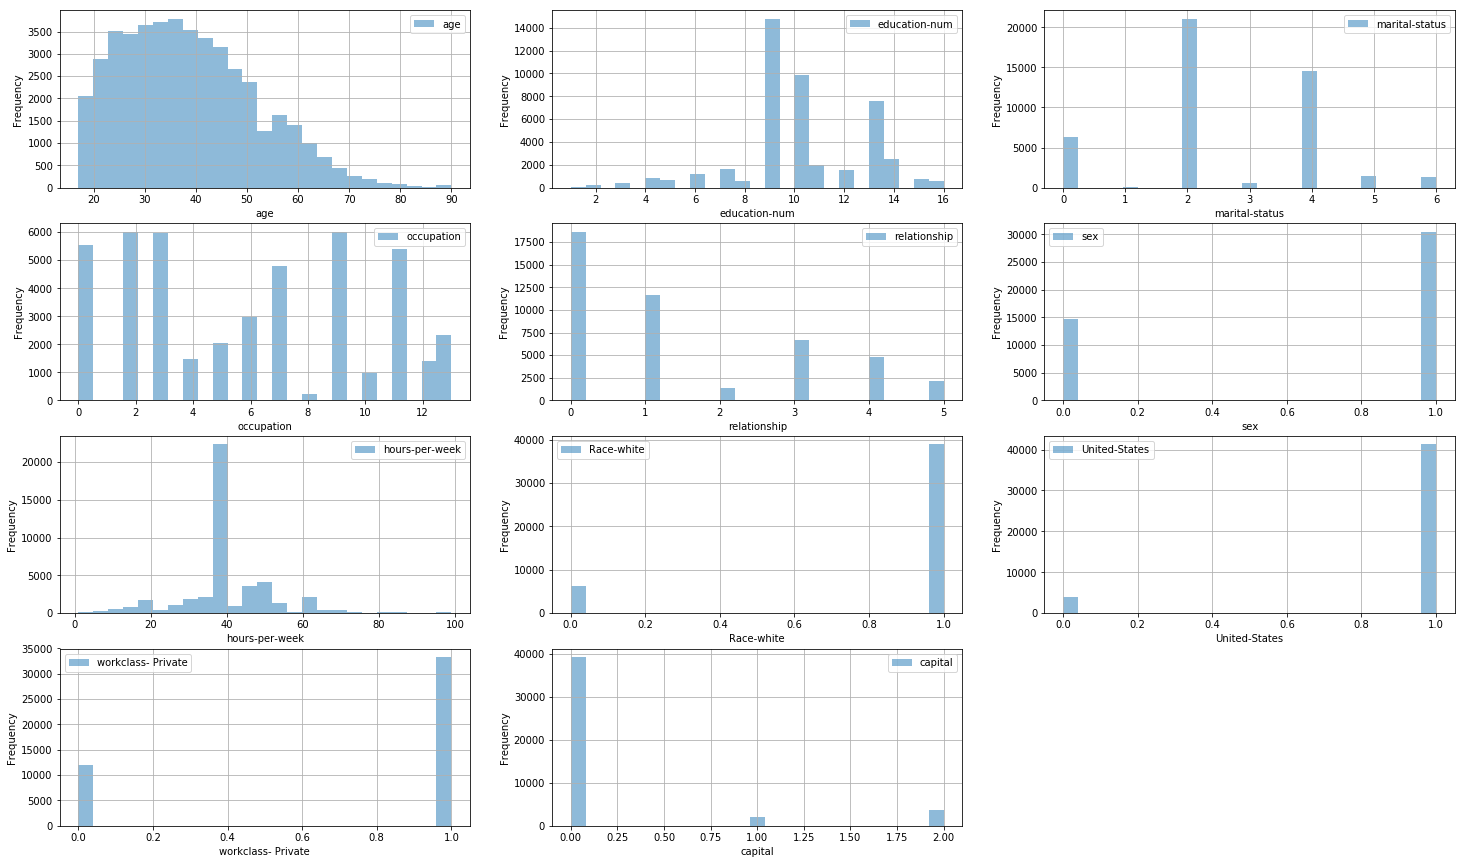

In [15]:
plt.figure(figsize=(25,15))
for i,feature in enumerate(datos.columns.drop(['income'])):
    plt.subplot(4,3,i+1)   
    datos[feature].plot.hist(alpha=0.5, bins=25, grid = True)
    plt.xlabel(feature)
    plt.legend()
    #plt.title(feature)
plt.show()

<font color='blue'>Obviamente los datos no han cambido en referencia a las observaciones iniciales, pero características como el capital son más fácilmente interpretables.
    
Adicionalmente, creamos el histograma de distribución de las caractrísiticas (que ahora son todas numéricas) con valores no normalizados (para normalizarlos hay que reasignar "density=1") en relación a la caracterísitica que nos interesa "income"</font>

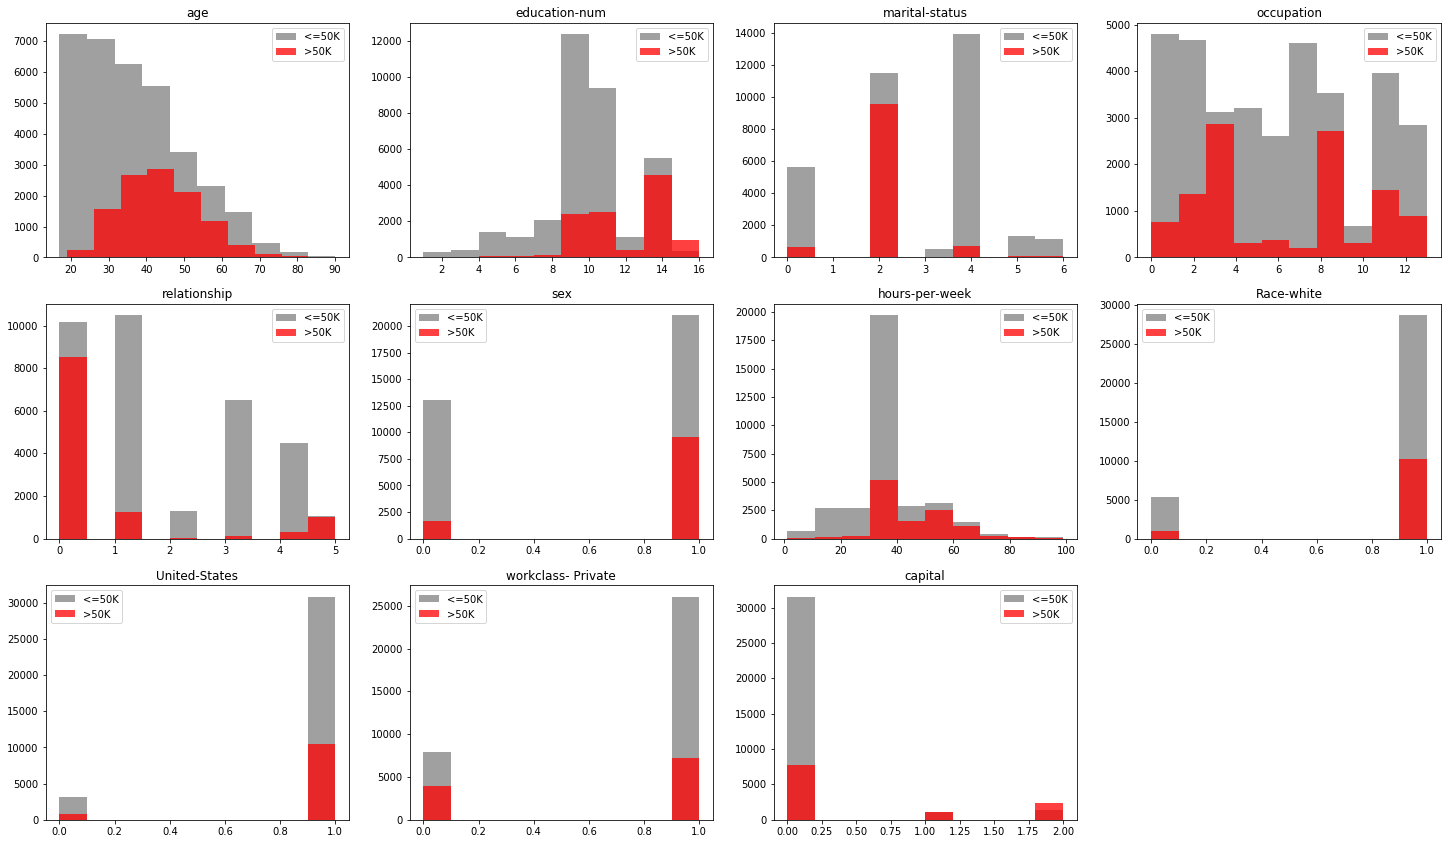

In [16]:
plt.figure(figsize=(25,25))

idx_0 =  datos['income'] == 0   # <=50K
idx_1 =  datos['income'] == 1   # >50K


for i,feature in enumerate(datos.columns.drop(['income'])):
    plt.subplot(5,4,i+1)   
    plt.hist(datos.loc[idx_0,feature],density=0, facecolor='grey', alpha=0.75,label='<=50K')
    plt.hist(datos.loc[idx_1,feature],density=0, facecolor='red', alpha=0.75,label='>50K')
    plt.legend()
    plt.title(feature)

plt.show()

<font color='blue'>Entre los dos histogramas se puede apreciar que en algunos casos las muestras de salarios se centran en un valor concreto, y se aprecia particularmente en casos donde el salario está por debajo de 50K como: 

     Por ejemplo: ' United-States', 'capital', 'Race-white' y 'workclass-Private'. 

En estos casos, es probable que en pasos posteriores puedan ser eliminadas, ya que su efecto en el modelo será minimo. 

Además las características education-num, age y hours-per-week aparecen más distribuidas y sería interesante analizarlas.Vamos a analizarlas:</font>

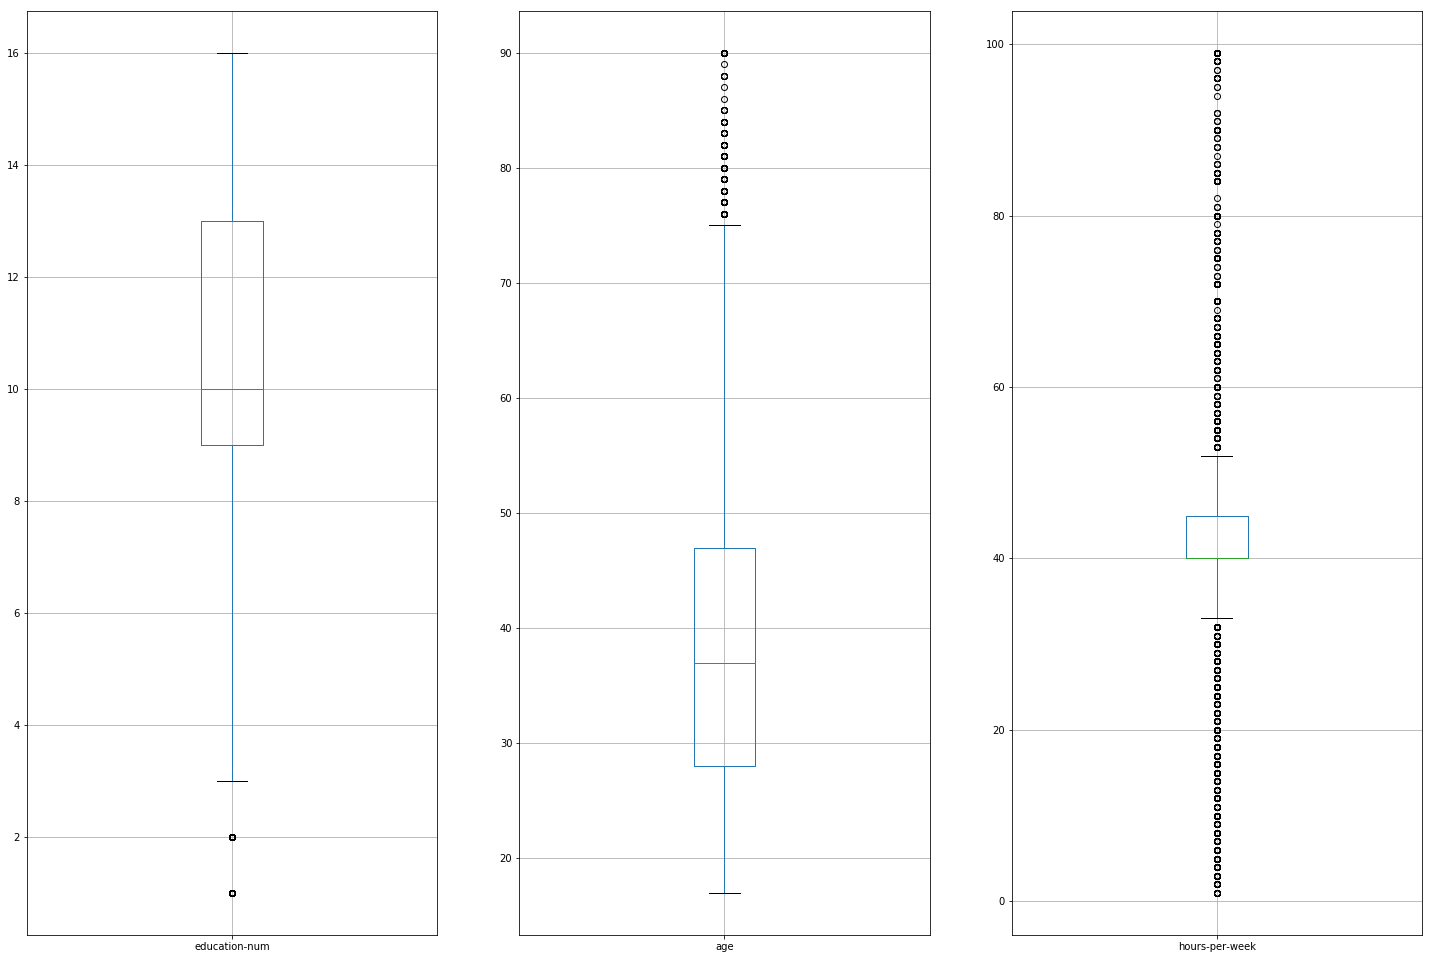

In [17]:
plt.figure(figsize=(25, 17))

fig = ['education-num','age','hours-per-week']
for i,feature in enumerate(fig):
    plt.subplot(1,3,i+1)
    datos.boxplot(column=feature)

plt.show()


<font color='blue'>En el caso de 'hours-per-week' eliminamos los outliers por encima de Q+-1.5RIC</font>

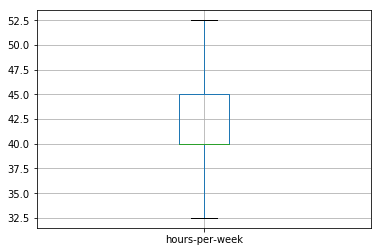

In [18]:
def quantile_min_max_outliers(feature):
    quantile = feature.quantile([0.25, 0.5, 0.75])
    Q1 = quantile.iloc[0]
    Q3 = quantile.iloc[2]
    RIC = Q3 - Q1
    lmax = Q3 + RIC * 1.5
    lmin = Q1 - RIC * 1.5
    return (lmin, lmax)

def tratar_outliers (lmin, lmax, x):
    if x < lmin: 
        return (lmin)
    if x > lmax:
        return (lmax)
    return(x)

(lmin,lmax) = quantile_min_max_outliers(datos['hours-per-week'])
datos['hours-per-week']=datos['hours-per-week'].apply (lambda x: tratar_outliers(lmin,lmax,x))

plt.subplot(1,1,1)
datos.boxplot(column='hours-per-week')
plt.show()

## Correlación de datos

<font color='blue'>Calculamos la matriz de correlación, con valores entre [-1,1] y un gradiente de color que la verdad no parece la mejor forma de sacar conclusiones</font>

In [19]:
datos.corr().style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

,age,education-num,marital-status,occupation,relationship,sex,hours-per-week,income,Race-white,United-States,workclass- Private,capital
age,1.0,0.038,-0.27,-0.0045,-0.25,0.082,0.11,0.24,0.027,0.012,-0.21,0.13
education-num,0.038,1.0,-0.065,0.09,-0.088,0.0034,0.18,0.33,0.052,0.13,-0.16,0.14
marital-status,-0.27,-0.065,1.0,0.016,0.18,-0.12,-0.18,-0.19,-0.081,-0.033,0.082,-0.07
occupation,-0.0045,0.09,0.016,1.0,-0.052,0.057,0.031,0.05,0.00033,0.0086,-0.0065,0.017
relationship,-0.25,-0.088,0.18,-0.052,1.0,-0.58,-0.28,-0.25,-0.13,-0.013,0.087,-0.095
sex,0.082,0.0034,-0.12,0.057,-0.58,1.0,0.26,0.22,0.1,-0.0086,-0.065,0.077
hours-per-week,0.11,0.18,-0.18,0.031,-0.28,0.26,1.0,0.27,0.083,0.026,-0.096,0.11
income,0.24,0.33,-0.19,0.05,-0.25,0.22,0.27,1.0,0.083,0.039,-0.12,0.3
Race-white,0.027,0.052,-0.081,0.00033,-0.13,0.1,0.083,0.083,1.0,0.19,-0.0035,0.033
United-States,0.012,0.13,-0.033,0.0086,-0.013,-0.0086,0.026,0.039,0.19,1.0,-0.048,0.022


<font color='blue'>Otra forma de verlo es con un intervalo entre 0 y 1, y eliminando la mitad superior de los datos ya que son redundantes:</font>

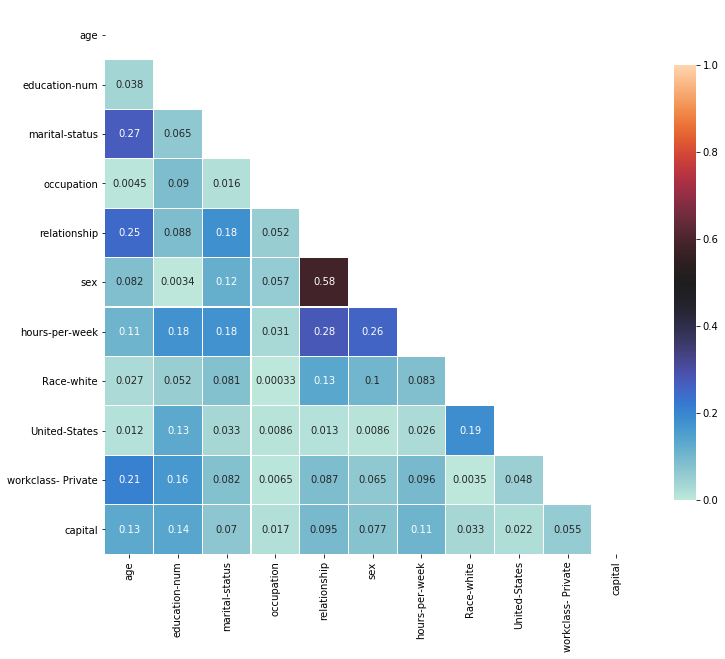

In [20]:
# Compute the correlation matrix
corr = np.abs(datos.drop(['income'], axis=1).corr())

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,vmin = 0.0, vmax=1.0, center=0.5,
            linewidths=.1, annot=True, cbar_kws={"shrink": .8})

plt.show()

<font color='blue'>Aparentemente hay un grado medio de relación entre 'sex' y 'relationship', por lo que vamos a analizarlo:</font>

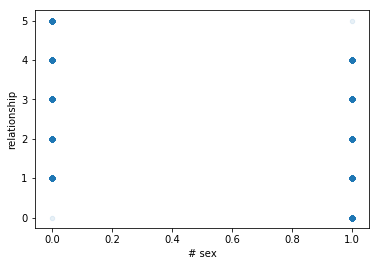

In [21]:
datos.plot(kind = 'scatter',x='sex',y = 'relationship', alpha = 0.1)
plt.xlabel('# sex')
plt.ylabel('relationship')
plt.show()

<font color='blue'>El grado de correlación no es suficiente como para poder eliminar una de las dos.</font>

## Métricas en clasificación

### División train/test 

<font color='blue'>En este punto empezamos a trabajar con los datos que hemos analizado y tratado.
    
Dividimos en los grupos de test (75%) y train (25%) y estratificamos (stratify = y) para tener la misma proporción en ambos conjuntos de valores de 'income' tanto por encima, como por debajo de 50k.

Posteriormente escalamos los datos, ya que en algunos modelos es una acción necesaria.</font>

In [22]:
columns_to_drop = []
columns_to_drop.append('income')
features = datos.columns.drop(columns_to_drop)

X = datos[features].values
y = datos['income'].values


# PASO 1:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify = y, random_state=0)

# Escalamos (con los datos de train)
scaler = StandardScaler().fit(X_train)
Xs_train = scaler.transform(X_train)
Xs_test  = scaler.transform(X_test)

print('Datos train: ', Xs_train.shape)
print('Datos test:  ', Xs_test.shape)

print('Propocion train:%0.3f'%np.mean(y_train))
print('Propocion test: %0.3f'%np.mean(y_test))


Datos train:  (33916, 11)
Datos test:   (11306, 11)
Propocion train:0.248
Propocion test: 0.248


## Matriz de confusión y métricas

<font color='blue'>Vamos a disponer del código que permite representar la matriz de confusión, así como a partir de la misma calcular distintas métricas para varios modelos.

La matriz de confusión permite clasificar en cuatro bloques en función de la clase del dato y su predicción:

    - True Positive (TP) y True Negative (TN): correctamente clasificados.
    - False Positive (FP): La predicción no clasificada correctamente en la clase de interés
    - False Negative (FN): La predicción no clasificada correctamente en la clase de no interés

A partir de estos datos se pueden calcular las siguientes medidas:

    - La tasa de acierto o accuracy nos indica la bondad del método. Recordar que en función del objetivo propuesto no es suficiente.
</font>

$$accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

<font color='blue'> 
    - La sensibilidad o sensibility o recall nos indica la capacidad de detectar los casos positivos correctamente. En función de lo que se pretenda valores no cercanos a 1; invalidan el método.
</font>

$$recall = \frac{TP}{TP + FN}$$

<font color='blue'> 
      
    - La precisión o precision nos indica que el sistema tiene buen ratio en detectar la clase de interés.
</font>

$$precision = \frac{TP}{TP + FP}$$

<font color='blue'> 
    - La especificidad o specificity nos indica la capacidad de detectar los casos negativos correctamente. En función de lo que se pretenda valores no cercanos a 1; invalidan el método.
</font>

$$specificity = \frac{TN}{TN + FP}$$

<font color='blue'> 
    
    - El F Score combina la precisión y recall en una sola medida para indicar la bondad del método. Recordar que en función del objetivo propuesto no es suficiente. 
</font>

$$FScore= \frac{2*precision*recall}{recall+precision}= \frac{2*TP}{2*TP + FP + FN}$$

In [23]:
def plot_confusion_matrix(confmat):
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.5)
    for i in range(confmat.shape[0]):
        for j in range(confmat.shape[1]):
            ax.text(x=j, y=i, s=confmat[i, j], va='center', ha='center')

    plt.xlabel('predicted label')
    plt.ylabel('true label')

    plt.tight_layout()
    plt.show()

In [24]:
def calcula_metricas(confmat):
    
    tn, fp, fn, tp = confmat.ravel()
    tn = float(tn)
    fp = float(fp)
    fn = float(fn)
    tp = float(tp)
    
    acc = (tp+tn)/(tn+fp+fn+tp)
    sen = tp/(tp+fn)
    esp = tn/(tn+fp)
    ppv = tp/(tp+fp)
    fsc = 2*(sen*ppv/(sen+ppv))
    
    print('ACC: ', acc)
    print('SEN: ', sen,' como detecta la clase 1')
    print('ESP: ', esp,' como detecta la clase 0')
    print('PPV: ', ppv,' precisión')
    print('FSC: ', fsc)
    
    plt.bar(range(5),[acc,sen,esp,ppv,fsc])
    plt.xticks(range(5),['ACC','SEN','ESP','PPV','FSC'])
    plt.plot([-1,6], [1,1], color=(0.6, 0.6, 0.6), linestyle='--')
    plt.xlim((-0.5,4.5))
    plt.ylim((0,1.1))
    plt.title('Metricas')
    plt.show()

<font color='blue'>A continuación vamos a ir analizando distintos modelos utilizando las muestras de train para posteriormente validar el resultado con las muestras de test</font>

### Regresión logística

<font color='blue'>Como primer paso, para encontrar el valor óptimo del parámetro libre (el coste C) vamos a utilizar validación cruzada.
    
Dado que sabemos que la muestra esta descompensada, ya que existen 3/4 con sueldo inferior a 50k, he utilizado 'class weight' y 'f1' pero los resltados no han sido buenos. Lo he vuelto a calcular con otros parametros dados en el curso y el resultado ha mejorado.</font>

best mean cross-validation score: 0.709
best parameters: {'C': 0.2976351441631313}
test-set score: 0.71


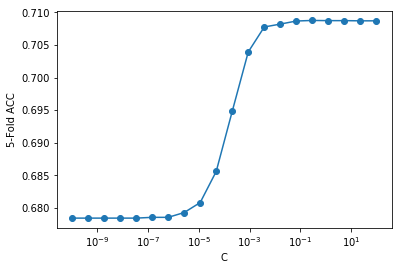

In [26]:
vectorC = np.logspace(-10, 2, 20)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring= 'accuracy', n_jobs=2, param_grid=param_grid, cv = 5)
#grid = GridSearchCV(LogisticRegression(random_state=0, class_weight='balanced'), scoring= 'f1', param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.2f}".format(grid.score(Xs_test, y_test)))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

<font color='blue'>Aplicamos el parámetro libre identificado: grid.best_params_['C']</font>

<font color='blue'>Como se ha explicado, a partir de los parámetros TP, TN, FP, FN, calculamos las siguiente métricas: SEN, ESP, PPV, FSC, ACC.</font>

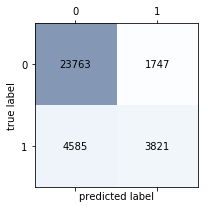

ACC:  0.8133034555961788
SEN:  0.45455626933142995  como detecta la clase 1
ESP:  0.9315170521364171  como detecta la clase 0
PPV:  0.686242816091954  precisión
FSC:  0.5468727637040217


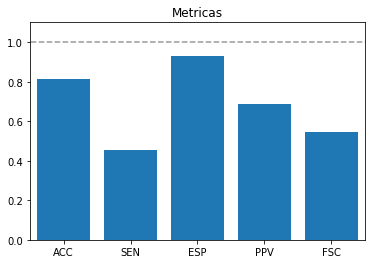

In [27]:
lr = LogisticRegression(C=grid.best_params_['C']).fit(Xs_train,y_train)
y_pred_lr_train = lr.predict(Xs_train)
confmat_lr_train = confusion_matrix(y_train,y_pred_lr_train)
plot_confusion_matrix(confmat_lr_train)
calcula_metricas(confmat_lr_train)

<font color='blue'>Los datos para train no son malos ni son muy buenos. Salvo por el cálculo de la especificidad.</font>

<font color='blue'>Calculamos las métricas de performance en el conjunto de test.</font>

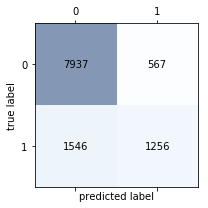

ACC:  0.813108084203078
SEN:  0.44825124910778014  como detecta la clase 1
ESP:  0.9333254938852305  como detecta la clase 0
PPV:  0.6889742183214481  precisión
FSC:  0.5431351351351352


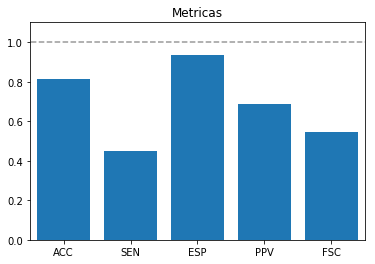

In [28]:
y_pred_lr_test = lr.predict(Xs_test)
confmat_lr_test = confusion_matrix(y_test,y_pred_lr_test)
plot_confusion_matrix(confmat_lr_test)
calcula_metricas(confmat_lr_test)

<font color='blue'>Al igual que con los valores de train, los resultados no son muy buenos, salvo para el cálculo de la especificidad.</font>

<font color='blue'>Representamos el histograma de probabilidad estimada 'y_prob' para el conjunto de test. Utilizamos "density = 1" dado que el número de muestras está desvalanceado, por lo que visualmente los datos no son realistas.</font>

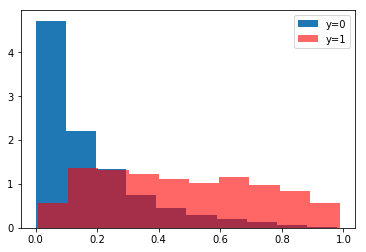

In [29]:
y_prob_lr = lr.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob_lr[idx_0], density = 1, label = 'y=0')
plt.hist(y_prob_lr[idx_1], density = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

<font color='blue'>Si no me equivoco los datos se dividen en el eje de las X en el valor 'C': 0.297635, lo que parece un valor adecuado ya que no veo forma de ajustar mejor los datos.</font>

<font color='blue'>Por último, vamos a representar la curva ROC. El gráfico mide la relación entre:
    - En el eje vertical, la capacidad de detectar los casos positivos correctamente, es decir la sensibilidad o recall.
    - En el eje horizontal, la tasa de resultados positivos incorrectos. 
</font>

$$(1-especificidad)=\frac{FP}{TP + FP}$$

<font color='blue'>
La diagonal central indica que el método es aleatorio. Lo ideal es la linea en la esquina superior izquierda pegada a los ejes (maximiza la distancia de la diagonal central). El valor UAC muestra el área debajo de la curva.
</font>

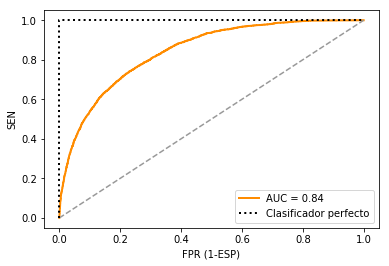

In [30]:
ejex, ejey, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show() 

<font color='blue'>Tiene un AUC de 0.84, que no está mál como primera aproximación.</font>

### KNeighborsClassifier

best mean cross-validation score: 0.830
best parameters: {'n_neighbors': 26}


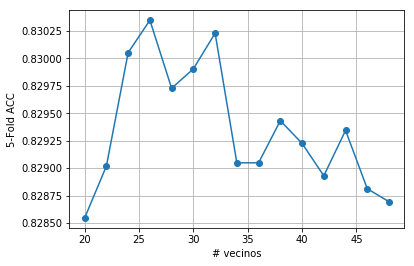

In [31]:
NVecinosIni = 20
NVecinosFin = 50
j = 2
nVecinos = range(NVecinosIni,NVecinosFin,j)

param_grid = {'n_neighbors':  np.arange(NVecinosIni, NVecinosFin, j)}
grid = GridSearchCV(KNeighborsClassifier(),scoring= 'accuracy', n_jobs=2, param_grid=param_grid, cv = 10)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score']) 
stdvalues = np.array(grid.cv_results_['std_test_score'])
plt.plot(nVecinos,scores,'-o')
plt.errorbar(nVecinos, scores, yerr=stdvalues, ecolor='g')
plt.xlabel('# vecinos')
plt.ylabel('5-Fold ACC')
plt.grid()
plt.show()

<font color='blue'>Mejora el CV score (0.830) frente a la regresión logística (0.709).</font>

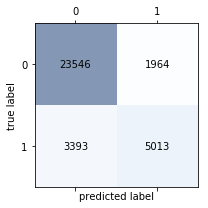

ACC:  0.8420509494044109
SEN:  0.5963597430406852  como detecta la clase 1
ESP:  0.9230105840846726  como detecta la clase 0
PPV:  0.7185036548659882  precisión
FSC:  0.6517584346356368


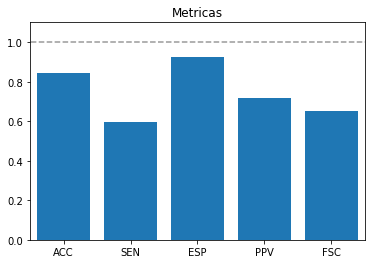

In [32]:
y_pred_knn_train = grid.predict(Xs_train)
confmat_knn_train = confusion_matrix(y_train,y_pred_knn_train)
plot_confusion_matrix(confmat_knn_train)
calcula_metricas(confmat_knn_train)

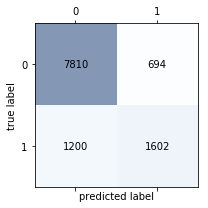

ACC:  0.8324783300902175
SEN:  0.5717344753747323  como detecta la clase 1
ESP:  0.9183913452492944  como detecta la clase 0
PPV:  0.6977351916376306  precisión
FSC:  0.6284817575519811


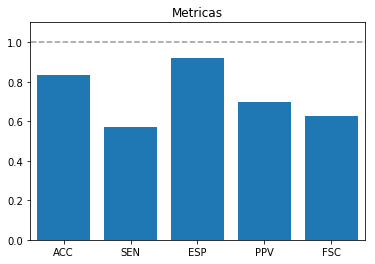

In [33]:
y_pred_knn_test = grid.predict(Xs_test)
confmat_knn_test = confusion_matrix(y_test,y_pred_knn_test)
plot_confusion_matrix(confmat_knn_test)
calcula_metricas(confmat_knn_test)

<font color='blue'>Los datos en general son mejores que los del modelo de regresion lineal. Los datos de la matriz de confusión mejoran ya que clasifican mejor unas 300 muestras, lo que refleja en los resultados de las distintas medidas unas pequeñas mejoras.</font>

<font color='blue'>Se vuelve a calcular el histograma de predicciones para las muestras de test.</font>

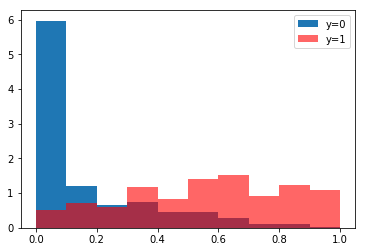

In [34]:
y_prob_knn = grid.predict_proba(Xs_test)[:,1]

idx_0 = (y_test==0)
idx_1 = (y_test==1)

plt.hist(y_prob_knn[idx_0], density = 1, label = 'y=0')
plt.hist(y_prob_knn[idx_1], density = 1, facecolor = 'r',alpha=0.6, label = 'y=1')
plt.legend(loc=1)
plt.show()

<font color='blue'>En éste caso parece que un valor de X entorno a 0,3 sería adecuado a la hora de establecer el punto de sepración</font>

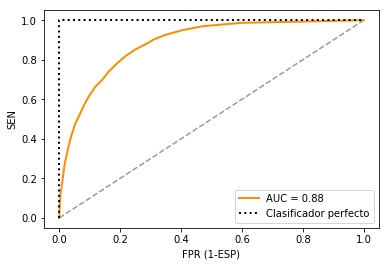

In [35]:
ejex, ejey, _ = roc_curve(y_test, y_prob_knn)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

<font color='blue'>La curva ROC permite ver que hemos mejorado el AUC respecto al modelo anterior (0,84).</font>

### Polinomio de grado 2

best mean cross-validation score: 0.837
best parameters: {'C': 0.069519279617755905}


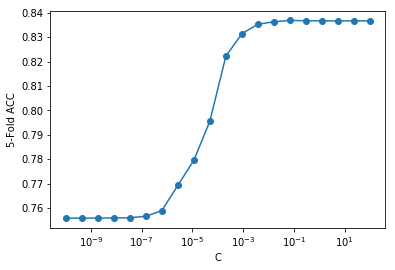

In [36]:
poly = PolynomialFeatures(2)
XtrainScaledPoly = poly.fit_transform(Xs_train)
XtestScaledPoly = poly.fit_transform(Xs_test)

vectorC = np.logspace(-10, 2, 20)
param_grid = {'C': vectorC}
grid = GridSearchCV(LogisticRegression(fit_intercept=False), scoring= 'accuracy', param_grid=param_grid, cv = 5)
grid.fit(XtrainScaledPoly, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.semilogx(vectorC,scores,'-o')
plt.xlabel('C')
plt.ylabel('5-Fold ACC')
plt.show()

<font color='blue'>El CV score ha mejorado mínimamente en 0,007</font>

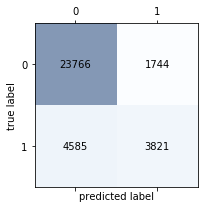

ACC:  0.8133919094232811
SEN:  0.45455626933142995  como detecta la clase 1
ESP:  0.9316346530772246  como detecta la clase 0
PPV:  0.6866127583108715  precisión
FSC:  0.5469901939732303


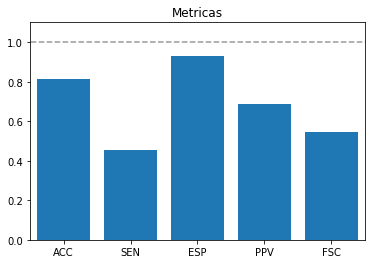

In [37]:
lr2 = LogisticRegression(C=grid.best_params_['C']).fit(Xs_train,y_train)
y_pred_lr2_train = lr2.predict(Xs_train)
confmat_lr2_train = confusion_matrix(y_train,y_pred_lr2_train)
plot_confusion_matrix(confmat_lr2_train)
calcula_metricas(confmat_lr2_train)

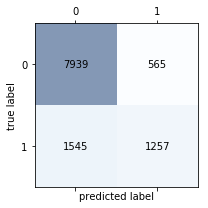

ACC:  0.8133734300371485
SEN:  0.4486081370449679  como detecta la clase 1
ESP:  0.933560677328316  como detecta la clase 0
PPV:  0.6899012074643249  precisión
FSC:  0.5436851211072664


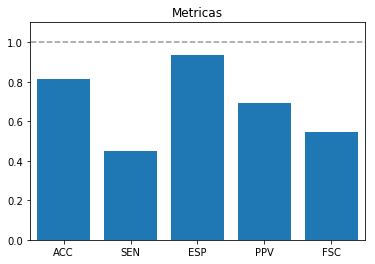

In [38]:
y_pred_lr2_test = lr2.predict(Xs_test)
confmat_lr2_test = confusion_matrix(y_test,y_pred_lr2_test)
plot_confusion_matrix(confmat_lr2_test)
calcula_metricas(confmat_lr2_test)

<font color='blue'>En éste caso mejora minimamente, casi inapreciable respecto a KNN</font>

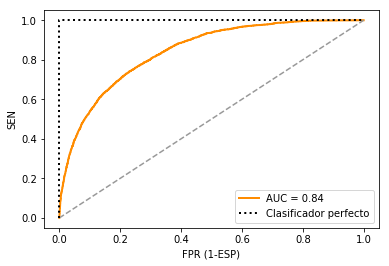

In [39]:
ejex, ejey, _ = roc_curve(y_test, y_prob_lr)
roc_auc = auc(ejex, ejey)

plt.figure()
plt.plot(ejex, ejey, color='darkorange',lw=2, label='AUC = %0.2f' % roc_auc)

plt.plot([0, 1], [0, 1], color=(0.6, 0.6, 0.6), linestyle='--')
plt.plot([0, 0, 1],[0, 1, 1],lw=2, linestyle=':',color='black',label='Clasificador perfecto')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])

plt.xlabel('FPR (1-ESP)')
plt.ylabel('SEN')
plt.legend(loc="lower right")
plt.show()

<font color='blue'>En éste caso no mejora respecto a KNN</font>

### Arboles de Decisión

best mean cross-validation score: 0.834
best parameters: {'max_depth': 7}


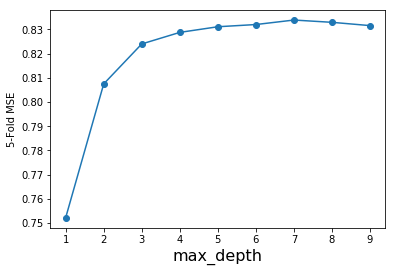

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

maxDepth = range(1,10)
param_grid = {'max_depth': maxDepth }
grid = GridSearchCV(DecisionTreeClassifier(random_state=0), param_grid=param_grid, cv = 5)
grid.fit(X_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth',fontsize=16)
plt.ylabel('5-Fold MSE')
#plt.ylim((-1, 0))
plt.show()

In [41]:
maxDepthOptimo = grid.best_params_['max_depth']
treeModel = DecisionTreeClassifier(max_depth=maxDepthOptimo).fit(Xs_train,y_train)

print("ACC Train: ",treeModel.score(Xs_train,y_train))
print("ACC Test: ",treeModel.score(Xs_test,y_test))

ACC Train:  0.840635688171
ACC Test:  0.829471077304


<font color='blue'>Visualizamos el arbol de decision</font>

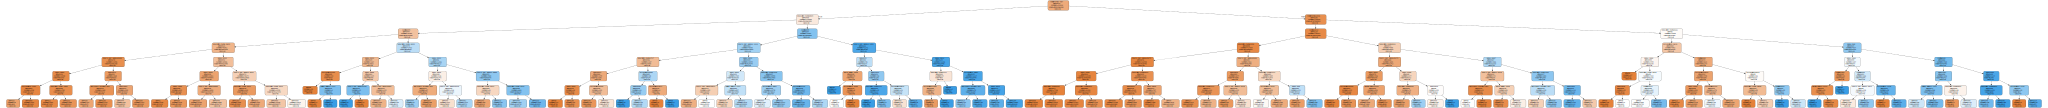

In [45]:
from sklearn.tree import export_graphviz
import graphviz

tree_dot = export_graphviz(treeModel, out_file=None, feature_names=features, class_names=['B','M'],  
                         filled=True, rounded=True,  special_characters=True)
graph = graphviz.Source(tree_dot) 
graph

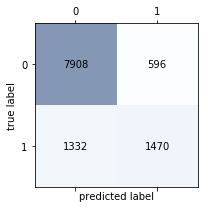

ACC:  0.8294710773040863
SEN:  0.5246252676659529  como detecta la clase 1
ESP:  0.9299153339604892  como detecta la clase 0
PPV:  0.7115198451113263  precisión
FSC:  0.6039441248972884


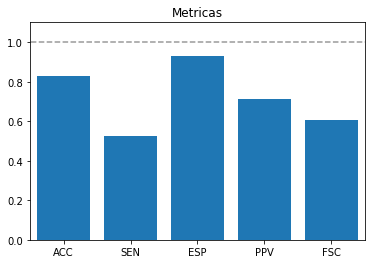

In [47]:
y_pred_ad_test = treeModel.predict(Xs_test)
confmat_ad_test = confusion_matrix(y_test,y_pred_ad_test)
plot_confusion_matrix(confmat_ad_test)
calcula_metricas(confmat_ad_test)

<font color='blue'>De nuevo el modelo mejora minimamente los resultados.</font>

### Random forest

best mean cross-validation score: 0.842
best parameters: {'max_depth': 12}


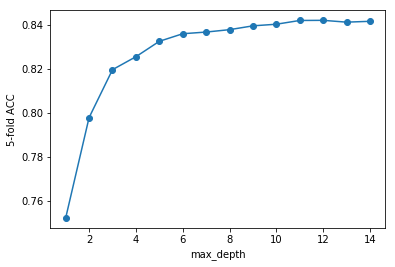

In [48]:
maxDepth = range(1,15)
tuned_parameters = {'max_depth': maxDepth}

grid = GridSearchCV(RandomForestClassifier(random_state=0, n_estimators=200, max_features='sqrt'), param_grid=tuned_parameters,cv=5) 
grid.fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

scores = np.array(grid.cv_results_['mean_test_score'])
plt.plot(maxDepth,scores,'-o')
plt.xlabel('max_depth')
plt.ylabel('5-fold ACC')

plt.show()

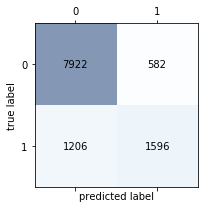

ACC:  0.8418538828940386
SEN:  0.569593147751606  como detecta la clase 1
ESP:  0.9315616180620885  como detecta la clase 0
PPV:  0.7327823691460055  precisión
FSC:  0.6409638554216867


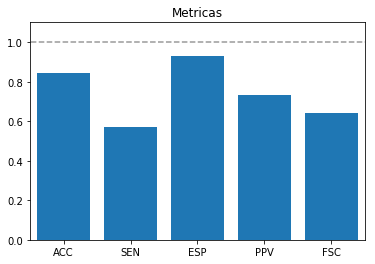

In [49]:
y_pred_rf_test = grid.predict(Xs_test)
confmat_rf_test = confusion_matrix(y_test,y_pred_rf_test)
plot_confusion_matrix(confmat_rf_test)
calcula_metricas(confmat_rf_test)

<font color='blue'>De nuevo los valores mejoran respecto al modelo anterior.</font>

### Boosted Tree

<font color='blue'>En éste caso hay 3 parámetros libres. Barremos con 2 y fijamos 1 (max_depth).</font>

In [50]:
Niterations = [25,50,75,100,200,300,400,500,600]
learningRate = [0.5,0.05,0.01,0.005]
# Fijamos max_depth = 3.

param_grid = {'n_estimators': Niterations,'learning_rate':learningRate }
grid = GridSearchCV(GradientBoostingClassifier(random_state=0, max_depth=3), param_grid=param_grid, cv = 5)
grid.fit(Xs_train, y_train)
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.845
best parameters: {'learning_rate': 0.05, 'n_estimators': 400}


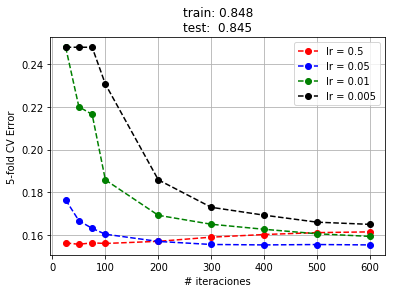

In [52]:
# calculamos métricas globales
bt = GradientBoostingClassifier(random_state=0, max_depth=3,learning_rate= 0.05, n_estimators= 300)
bt.fit(Xs_train, y_train)

error = 1-grid.cv_results_['mean_test_score'].reshape(len(learningRate),len(Niterations))
colors = ['r','b','g','k','m']
for i,lr in enumerate(learningRate):    
    plt.plot(Niterations,error[i,:],colors[i] + '--o',label='lr = %g'%lr)

plt.legend()
plt.xlabel('# iteraciones')
plt.ylabel('5-fold CV Error')
plt.title('train: %0.3f\ntest:  %0.3f'%(bt.score(Xs_train,y_train),bt.score(Xs_test,y_test)))
plt.grid()
plt.show()

<font color='blue'>El learning rate de 0.05 tiene un buen comportamiento, y el resultado es el mejor obtenido por ahora (0.84)</font>

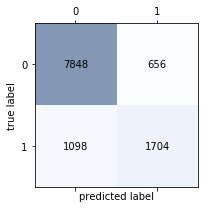

ACC:  0.8448611356801699
SEN:  0.6081370449678801  como detecta la clase 1
ESP:  0.922859830667921  como detecta la clase 0
PPV:  0.7220338983050848  precisión
FSC:  0.6602092212320806


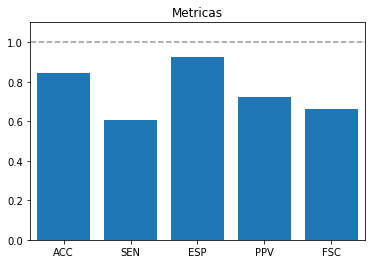

In [59]:
y_pred_bt_test = bt.predict(Xs_test)
confmat_bt_test = confusion_matrix(y_test,y_pred_bt_test)
plot_confusion_matrix(confmat_bt_test)
calcula_metricas(confmat_bt_test)

<font color='blue'>Los resultados vuelven a mejorar mínimamente. El número de muestras correctamente clasificadas es mayor.</font>

<font color='blue'>En éste punto vamos a analizar la importancia de las características actuales para conocer mejor el problema</font>

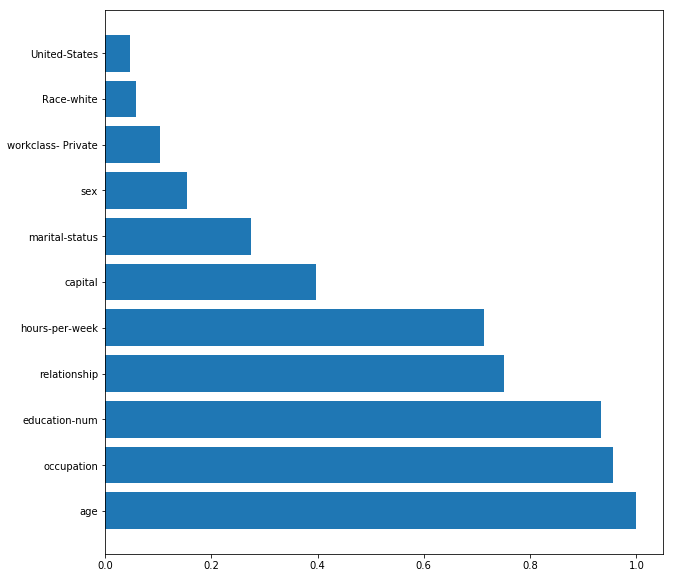

In [62]:
importances = bt.feature_importances_
importances = importances / np.max(importances)

indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,10))
plt.barh(range(Xs_train.shape[1]),importances[indices])
plt.yticks(range(Xs_train.shape[1]),features[indices])
plt.show()

<font color='blue'>Tiene sentido que la edad, ocupación y educación sean los parámetros que mejor definen los ingresos. Podríamos volver ha hacer los cálculo con estas características y analizar el grao de error obtenido.

Y también podemos representar la dependencia de cada característica con la variable target</font>

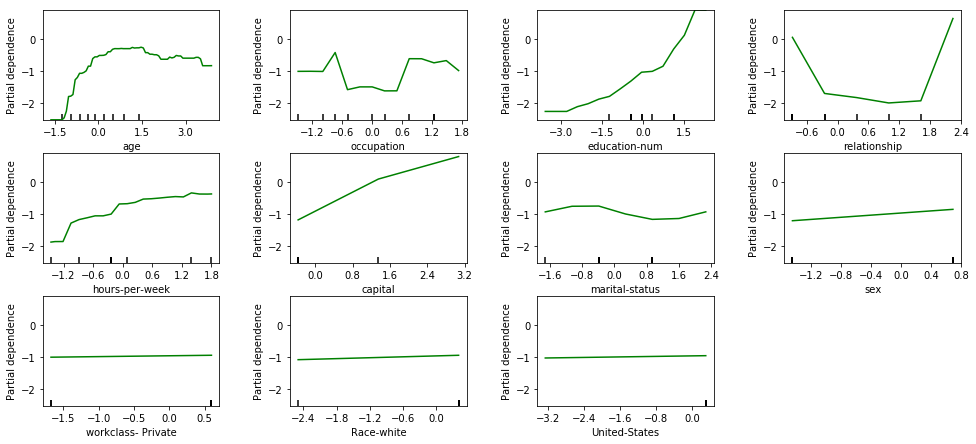

In [65]:
fig, ax = plot_partial_dependence(bt, Xs_train, indices, feature_names=features,
                                 percentiles=(0.0, 1.0), n_cols = 4)
fig.set_size_inches(15, 10)
plt.show()

<font color='blue'>Las características aparecen ordenadas de las más importante a la menos importante. Las características tienen que ser observadas entre la primera y última marca del eje de las X. Puede verse que la influencia de la edad se va incrementano, pero luego disminuye, el impacto de ocupación no es claro, pero el numero de años de educaicón si parece que refleja una dependencia creciente de dicha característica para con la variable tarjet.

Es curioso porque parece que las horas por semana y el capital tambien tiene una dependencia alta

Estos gráficos tengo que volver a analizarlos.</font>

### SVM Kernel linear

In [54]:
vectorC = np.logspace(-3, 3, 21)

param_grid = {'C': vectorC}

grid = GridSearchCV(SVC(kernel='linear'),scoring='accuracy', param_grid=param_grid, cv=5).fit(Xs_train, y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.809
best parameters: {'C': 0.50118723362727202}


In [56]:
Copt = grid.best_params_['C']

svmModel3 = SVC(kernel='linear',C = Copt, probability=True).fit(Xs_train, y_train)

print('Acc (TEST): %0.2f'%svmModel3.score(Xs_test, y_test))

Acc (TEST): 0.81


<font color='blue'>Es curioso, pero el resultado de aplicar SVM no es especialmente bueno</font>

### SVM Kernel RBF

In [66]:
vectorC = np.logspace(-3, 3, 21)
vectorG = np.logspace(-5, 1, 21)

param_grid = {'C': vectorC,
              'gamma':vectorG}

grid = GridSearchCV(SVC(kernel='rbf'),scoring='accuracy', n_jobs=2, param_grid=param_grid, cv=5).fit(Xs_train,y_train)

print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))

best mean cross-validation score: 0.836
best parameters: {'C': 1.0, 'gamma': 0.079432823472428138}


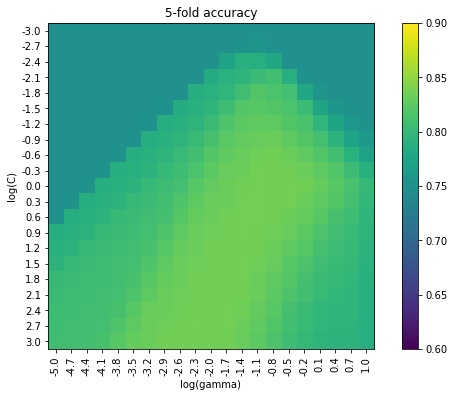

In [67]:
# Mostramos prestaciones en CV
scores = grid.cv_results_['mean_test_score'].reshape(len(vectorC),len(vectorG))

plt.figure(figsize=(10,6))
plt.imshow(scores, interpolation='nearest', vmin= 0.6, vmax=0.9)
plt.xlabel('log(gamma)')
plt.ylabel('log(C)')
plt.colorbar()
plt.xticks(np.arange(len(vectorG)), np.log10(vectorG), rotation=90)
plt.yticks(np.arange(len(vectorC)), np.log10(vectorC))
plt.title('5-fold accuracy')
plt.show()

In [69]:
Copt = grid.best_params_['C']
Gopt = grid.best_params_['gamma']

svmM = SVC(kernel='rbf',gamma = Gopt, C = Copt, probability=True).fit(Xs_train,y_train)

print('Acc (TEST): %0.2f'%svmM.score(Xs_test,y_test))

Acc (TEST): 0.84


<font color='blue'>En conclusión, el modelo de Bosted Tree es el que mejor resultado da en ACC (0.8448), y del resto de datos en general. Hay 1754 muestras mál clasificadas.</font>